##### Hier werden Ergebnisse der durchgeführten Simulationen dargestellt.

In [1]:
# Notwendige Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

### Truncation

In [ ]:
# Laden der Ergebnisse für die Truncation Strategie
trunc_atte = pd.read_csv('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/trunc_atte_linear+logit_rf_gb.csv')
trunc_ate = pd.read_csv('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/trunc_ate_linear+logit_rf_gb.csv')

In [3]:
# Übersicht der Ergebnisse für die Truncation Strategie: Anteil der Behandelten, Anteil der trunkierten Propensity Score-Werte, mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage erstellen
trunc_data = []
learner_list = ['LinearRegression(),LogisticRegressionCV()', 'LinearRegression(),RandomForestClassifier()',  'LinearRegression(),GradientBoostingClassifier()']
for res, res_name in zip([trunc_atte, trunc_ate], ['ATTE', 'ATE']):
    for learner in learner_list:
        result_df = res.loc[res.learner == learner]
        for col in result_df.trim_value.unique():
            mean_share_treated = result_df.loc[result_df.trim_value == col, 'share_treated'].mean()
            mean_share_trimmed_top = result_df.loc[result_df.trim_value == col, 'share_trimmed_top'].mean()
            mean_share_trimmed_bottom = result_df.loc[result_df.trim_value == col, 'share_trimmed_bottom'].mean()
            mean_share_trim_orcl_top = result_df.loc[result_df.trim_value == col, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = result_df.loc[result_df.trim_value == col, 'share_trim_orcl_bottom'].mean()
            mean_oracle = result_df.loc[result_df.trim_value == col, 'oracle'].mean()
            mean_abs_bias = result_df.loc[result_df.trim_value == col, 'mean_abs_bias'].iloc[0]
            mean_std_err = result_df.loc[result_df.trim_value == col, 'std err'].mean()
            var = result_df.loc[result_df.trim_value == col, 'var'].iloc[0]
            mse = result_df.loc[result_df.trim_value == col, 'MSE'].iloc[0]      
            cov = result_df.loc[result_df.trim_value == col, 'coverage'].iloc[0]
            mean_loss_g0 = result_df.loc[result_df.trim_value == col, 'loss_g0'].mean()
            mean_loss_g1 = result_df.loc[result_df.trim_value == col, 'loss_g1'].mean()
            mean_loss_m = result_df.loc[result_df.trim_value == col, 'loss_m'].mean()

            # Spaltenwerte umbennen
            if learner == 'LinearRegression(),LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'LinearRegression(),RandomForestClassifier()':
                methods = 'Linear + RF'	
            else:
                methods = 'Linear + GradBoost'
            row = {
                'res_name': res_name,
                'learner': methods + ' Truncation',
                'trim_value': col,
                'mean_share_treated': mean_share_treated,
                'mean_share_trim_top': mean_share_trimmed_top,
                'mean_share_trim_bottom': mean_share_trimmed_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim': mean_share_trimmed_top + mean_share_trimmed_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_orcl': mean_oracle,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': mean_loss_g0,
                'mean_loss_g1': mean_loss_g1,
                'mean_loss_m': mean_loss_m
            }
            trunc_data.append(row)

df_trunc = pd.DataFrame(trunc_data)

In [4]:
# Aufrunden der Werte für die Truncation Strategie
df_trunc_round = df_trunc.round({'mean_share_treated': 2, 'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl': 2, 'mean_orcl': 4, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

### Discarding

In [ ]:
# Laden der Ergebnisse für die Discarding Strategie
disc_atte = pd.read_csv('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/disc_atte_linear+logit_rf_gb.csv')
disc_ate = pd.read_csv('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/disc_ate_linear+logit_rf_gb.csv')

In [6]:
# Übersicht der Ergebnisse für die Discarding Strategie: Anteil der Behandelten, Anteil der entfernten extremen Propensity Scores, mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage erstellen
data_disc  = []
learner_list = ['LinearRegression(),LogisticRegressionCV()', 'LinearRegression(),RandomForestClassifier()', 'LinearRegression(),GradientBoostingClassifier()']
for res, res_name in zip([disc_atte, disc_ate], ['ATTE', 'ATE']):
    for learner in learner_list:
        df = res.loc[res.learner == learner]
        for col in df.trim_value.unique():
            mean_share_treated_pop = df.loc[df.trim_value == col, 'share_treated_pop'].mean()           
            mean_share_treated_sample = df.loc[df.trim_value == col, 'share_treated_sample'].mean()
            mean_share_trimmed_top = df.loc[df.trim_value == col, 'share_trimmed_top'].mean()
            mean_share_trimmed_bottom = df.loc[df.trim_value == col, 'share_trimmed_bottom'].mean()      
            mean_share_trim_orcl_top = df.loc[df.trim_value == col, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = df.loc[df.trim_value == col, 'share_trim_orcl_bottom'].mean()    
            mean_oracle = df.loc[df.trim_value == col, 'oracle'].mean()
            mean_abs_bias = df.loc[df.trim_value == col, 'mean_abs_bias'].iloc[0]
            mean_std_err = df.loc[df.trim_value == col, 'std err'].mean()
            var = df.loc[df.trim_value == col, 'var'].iloc[0]
            mse = df.loc[df.trim_value == col, 'MSE'].iloc[0]
            cov = df.loc[df.trim_value == col, 'coverage'].iloc[0]
            mean_loss_g0 = df.loc[df.trim_value == col, 'loss_g0'].mean()
            mean_loss_g1 = df.loc[df.trim_value == col, 'loss_g1'].mean()
            mean_loss_m = df.loc[df.trim_value == col, 'loss_m'].mean()
            # Spaltenwerte umbennen
            if learner == 'LinearRegression(),LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'LinearRegression(),RandomForestClassifier()':
                methods = 'Linear + RF'
            else:
                methods = 'Linear + GradBoost'
            row = {
                'res_name': res_name,
                'learner': methods + ' Discarding',
                'trim_value': col,
                'mean_share_treated_pop': mean_share_treated_pop,
                'mean_share_treated_sample': mean_share_treated_sample,
                'mean_share_trim_top': mean_share_trimmed_top,
                'mean_share_trim_bottom': mean_share_trimmed_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim': mean_share_trimmed_top + mean_share_trimmed_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_orcl': mean_oracle,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': mean_loss_g0,
                'mean_loss_g1': mean_loss_g1,
                'mean_loss_m': mean_loss_m
            }
            data_disc.append(row)

df_disc  = pd.DataFrame(data_disc)

In [7]:
# Aufrunden der Werte für die Discarding Strategie
df_disc_round = df_disc.round({'mean_share_treated_pop': 2, 'mean_share_treated_sample': 2, 'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl':2, 'mean_orcl': 4, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4, 'mean_loss_ml_g0': 4, 'mean_loss_ml_g1': 4, 'mean_loss_ml_m': 4})

#### Ergebnisse anschauen

In [8]:
# Tabellarische Übersicht für ATTE  mit der Truncation Strategie
df_trunc_round[df_trunc_round.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_orcl,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,Linear + Logit Truncation,0.001,49.99,1.48,1.48,2.82,2.84,2.96,5.66,1.4299,0.1819,0.1944,0.1379,0.1341,0.916,1.0037,1.0031,0.3335
1,Linear + Logit Truncation,0.010,49.99,6.23,6.24,10.18,10.25,12.47,20.43,1.4299,0.1400,0.1505,0.0387,0.0353,0.911,1.0039,1.0032,0.3345
2,Linear + Logit Truncation,0.050,49.99,14.86,14.98,20.76,20.87,29.83,41.64,1.4299,0.1079,0.1113,0.0221,0.0184,0.896,1.0037,1.0031,0.3419
3,Linear + Logit Truncation,0.100,49.99,21.20,21.32,27.18,27.26,42.52,54.44,1.4299,0.0990,0.0986,0.0193,0.0153,0.880,1.0037,1.0030,0.3573
4,Linear + RF Truncation,0.001,49.99,13.85,13.94,2.82,2.84,27.79,5.66,1.4299,2.8169,3.3598,13.4268,13.4432,0.988,1.0037,1.0031,0.3981
5,Linear + RF Truncation,0.010,49.99,18.29,18.38,10.18,10.25,36.67,20.43,1.4299,0.3913,0.5067,0.2448,0.2436,0.977,1.0039,1.0031,0.3850
6,Linear + RF Truncation,0.050,49.99,26.12,26.16,20.76,20.87,52.28,41.64,1.4299,0.1402,0.1755,0.0344,0.0305,0.955,1.0038,1.0030,0.3771
7,Linear + RF Truncation,0.100,49.99,31.02,31.05,27.18,27.26,62.07,54.44,1.4299,0.1082,0.1228,0.0223,0.0181,0.929,1.0038,1.0031,0.3853
8,Linear + GradBoost Truncation,0.001,49.99,0.00,0.00,2.82,2.84,0.00,5.66,1.4299,0.2745,0.3421,0.1390,0.1347,0.969,1.0037,1.0031,0.3510
9,Linear + GradBoost Truncation,0.010,49.99,7.80,8.04,10.18,10.25,15.84,20.43,1.4299,0.2473,0.3103,0.1063,0.1026,0.960,1.0039,1.0031,0.3511


In [9]:
# Tabellarische Übersicht für ATE mit der Truncation Strategie
df_trunc_round[df_trunc_round.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_orcl,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,Linear + Logit Truncation,0.001,49.99,1.48,1.48,2.82,2.84,2.96,5.66,-0.0024,0.1556,0.1644,0.0659,0.0658,0.910,1.0037,1.0031,0.3335
1,Linear + Logit Truncation,0.010,49.99,6.23,6.24,10.18,10.25,12.47,20.43,-0.0024,0.1185,0.1246,0.0225,0.0226,0.899,1.0039,1.0032,0.3345
2,Linear + Logit Truncation,0.050,49.99,14.86,14.98,20.76,20.87,29.83,41.64,-0.0024,0.0989,0.0981,0.0155,0.0155,0.876,1.0037,1.0031,0.3419
3,Linear + Logit Truncation,0.100,49.99,21.20,21.32,27.18,27.26,42.52,54.44,-0.0024,0.0947,0.0904,0.0142,0.0141,0.857,1.0037,1.0030,0.3573
4,Linear + RF Truncation,0.001,49.99,13.85,13.94,2.82,2.84,27.79,5.66,-0.0024,2.0734,2.5246,7.0136,7.0154,0.969,1.0037,1.0031,0.3981
5,Linear + RF Truncation,0.010,49.99,18.29,18.38,10.18,10.25,36.67,20.43,-0.0024,0.2830,0.3721,0.1283,0.1282,0.961,1.0039,1.0031,0.3850
6,Linear + RF Truncation,0.050,49.99,26.12,26.16,20.76,20.87,52.28,41.64,-0.0024,0.1201,0.1408,0.0222,0.0222,0.943,1.0038,1.0030,0.3771
7,Linear + RF Truncation,0.100,49.99,31.02,31.05,27.18,27.26,62.07,54.44,-0.0024,0.1006,0.1066,0.0157,0.0156,0.906,1.0038,1.0031,0.3853
8,Linear + GradBoost Truncation,0.001,49.99,0.00,0.00,2.82,2.84,0.00,5.66,-0.0024,0.2114,0.2600,0.0727,0.0726,0.961,1.0037,1.0031,0.3510
9,Linear + GradBoost Truncation,0.010,49.99,7.80,8.04,10.18,10.25,15.84,20.43,-0.0024,0.1911,0.2350,0.0569,0.0569,0.955,1.0039,1.0031,0.3511


In [10]:
# Tabellarische Übersicht für ATTE mit der Discarding Strategie
df_disc_round[df_disc_round.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated_pop,mean_share_treated_sample,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_orcl,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,Linear + Logit Discarding,0.001,49.99,49.97,1.49,1.47,2.82,2.84,2.96,5.66,1.3289,0.1671,0.1768,0.0774,0.0718,0.907,1.0039,1.0036,0.3437
1,Linear + Logit Discarding,0.010,49.99,50.00,6.28,6.30,10.18,10.25,12.58,20.43,1.1016,0.1358,0.1457,0.0507,0.0307,0.906,1.0042,1.0045,0.3792
2,Linear + Logit Discarding,0.050,49.99,50.08,15.00,15.12,20.76,20.87,30.12,41.64,0.7771,0.1085,0.1200,0.0555,0.0189,0.905,1.0053,1.0063,0.4530
3,Linear + Logit Discarding,0.100,49.99,50.06,21.30,21.38,27.18,27.26,42.68,54.44,0.5772,0.1031,0.1166,0.0602,0.0166,0.919,1.0054,1.0072,0.5108
4,Linear + RF Discarding,0.001,49.99,50.06,13.84,13.94,2.82,2.84,27.79,5.66,0.9769,0.3759,0.4780,0.2362,0.2304,0.981,1.0048,1.0053,0.4832
5,Linear + RF Discarding,0.010,49.99,50.06,18.29,18.41,10.18,10.25,36.70,20.43,0.9769,0.3759,0.4780,0.2362,0.2304,0.981,1.0048,1.0053,0.4832
6,Linear + RF Discarding,0.050,49.99,50.04,26.12,26.16,20.76,20.87,52.28,41.64,0.6337,0.1566,0.2060,0.0510,0.0387,0.963,1.0060,1.0072,0.5677
7,Linear + RF Discarding,0.100,49.99,49.99,31.00,31.02,27.18,27.26,62.02,54.44,0.4880,0.1330,0.1718,0.0386,0.0287,0.952,1.0077,1.0091,0.6080
8,Linear + GradBoost Discarding,0.001,49.99,49.99,0.00,0.00,2.82,2.84,0.00,5.66,1.4299,0.2726,0.3442,0.1364,0.1322,0.972,1.0039,1.0032,0.3512
9,Linear + GradBoost Discarding,0.010,49.99,50.15,7.76,8.02,10.18,10.25,15.78,20.43,1.1049,0.2334,0.3036,0.1127,0.0896,0.963,1.0043,1.0052,0.4078


In [11]:
# Tabellarische Übersicht für ATE mit der Discarding Strategie
df_disc_round[df_disc_round.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated_pop,mean_share_treated_sample,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_orcl,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,Linear + Logit Discarding,0.001,49.99,49.97,1.49,1.47,2.82,2.84,2.96,5.66,-0.0034,0.1403,0.1512,0.0416,0.0415,0.919,1.0039,1.0036,0.3437
1,Linear + Logit Discarding,0.010,49.99,50.00,6.28,6.30,10.18,10.25,12.58,20.43,-0.0012,0.1145,0.1208,0.0212,0.0212,0.905,1.0042,1.0045,0.3792
2,Linear + Logit Discarding,0.050,49.99,50.08,15.00,15.12,20.76,20.87,30.12,41.64,0.0024,0.1012,0.1031,0.0163,0.0164,0.892,1.0053,1.0063,0.4530
3,Linear + Logit Discarding,0.100,49.99,50.06,21.30,21.38,27.18,27.26,42.68,54.44,0.0017,0.0985,0.1026,0.0155,0.0155,0.889,1.0054,1.0072,0.5108
4,Linear + RF Discarding,0.001,49.99,50.06,13.84,13.94,2.82,2.84,27.79,5.66,0.0021,0.2763,0.3570,0.1234,0.1237,0.961,1.0048,1.0053,0.4832
5,Linear + RF Discarding,0.010,49.99,50.06,18.29,18.41,10.18,10.25,36.70,20.43,0.0021,0.2763,0.3570,0.1234,0.1237,0.961,1.0048,1.0053,0.4832
6,Linear + RF Discarding,0.050,49.99,50.04,26.12,26.16,20.76,20.87,52.28,41.64,0.0029,0.1448,0.1669,0.0326,0.0326,0.926,1.0060,1.0072,0.5677
7,Linear + RF Discarding,0.100,49.99,49.99,31.00,31.02,27.18,27.26,62.02,54.44,0.0014,0.1367,0.1457,0.0290,0.0290,0.909,1.0077,1.0091,0.6080
8,Linear + GradBoost Discarding,0.001,49.99,49.99,0.00,0.00,2.82,2.84,0.00,5.66,-0.0024,0.2136,0.2613,0.0726,0.0725,0.957,1.0039,1.0032,0.3512
9,Linear + GradBoost Discarding,0.010,49.99,50.15,7.76,8.02,10.18,10.25,15.78,20.43,0.0062,0.2286,0.2323,0.0828,0.0828,0.872,1.0043,1.0052,0.4078


In [12]:
# Ausreißerwert von Random Forest bei Truncation entfernen
df_trunc_filtered_bias = df_trunc.loc[df_trunc.mean_abs_bias < 1]

In [13]:
# Wegen identischer Werte für ml_g1 und ml_g0 mit RF und GradBoost, werden Werte mit GradBoost leicht verschoben
df_trunc.loc[df_trunc.learner == 'Linear + GradBoost Truncation', 'mean_loss_g1'] += 0.0001
df_trunc.loc[df_trunc.learner == 'Linear + GradBoost Truncation', 'mean_loss_g0'] += 0.0001

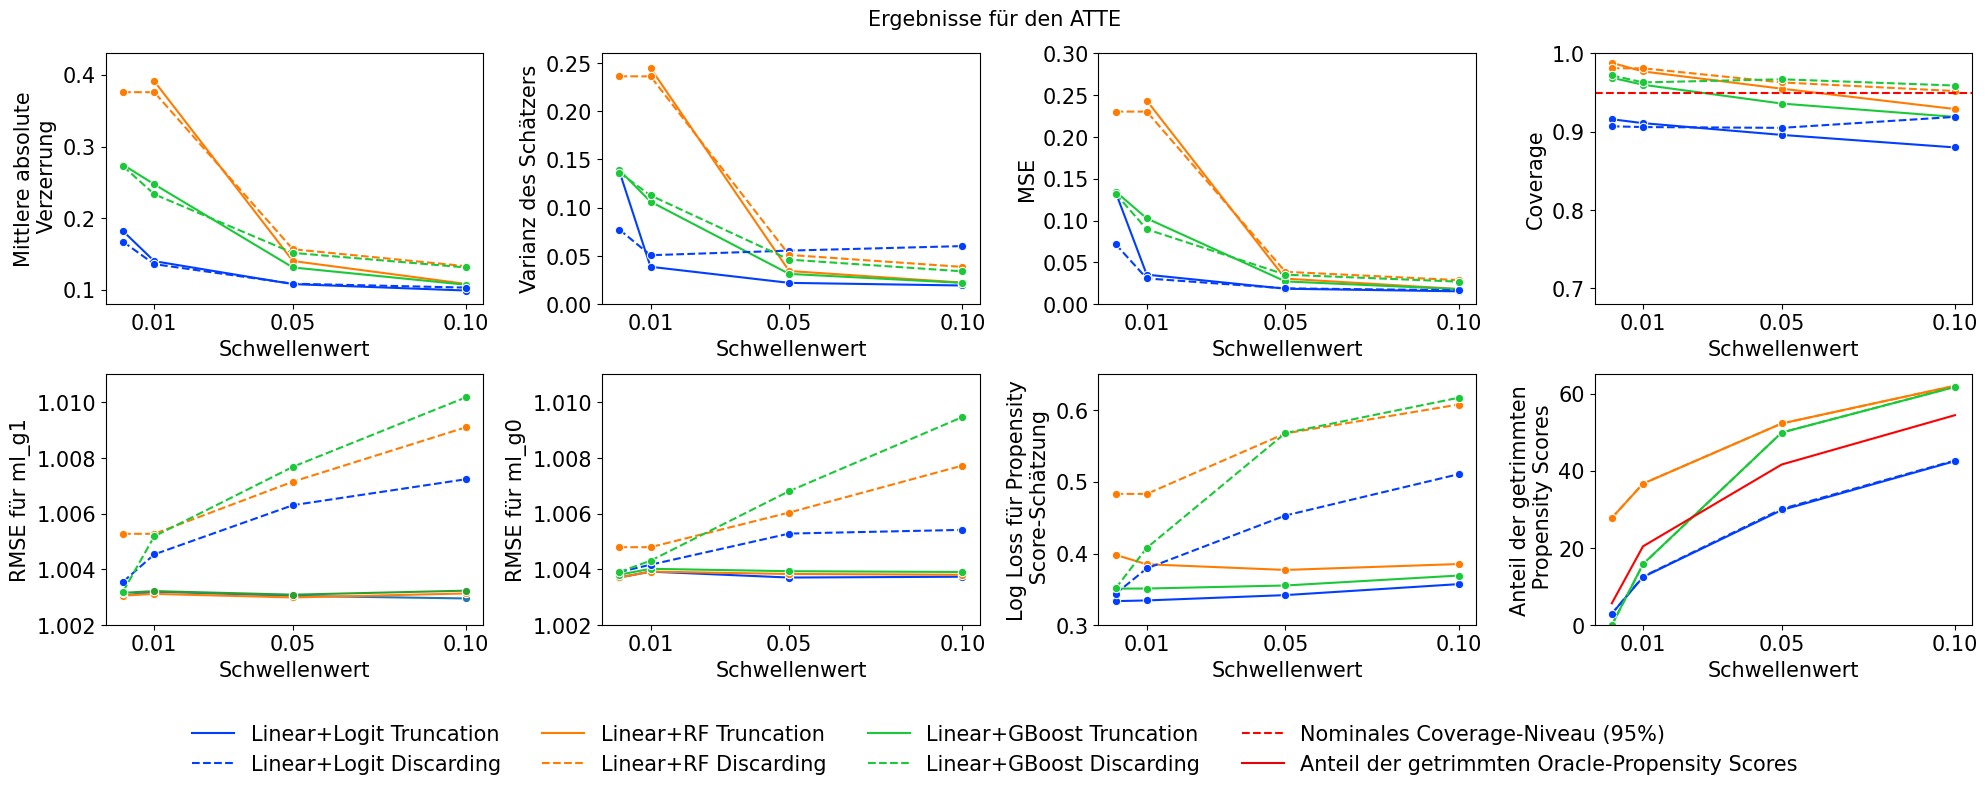

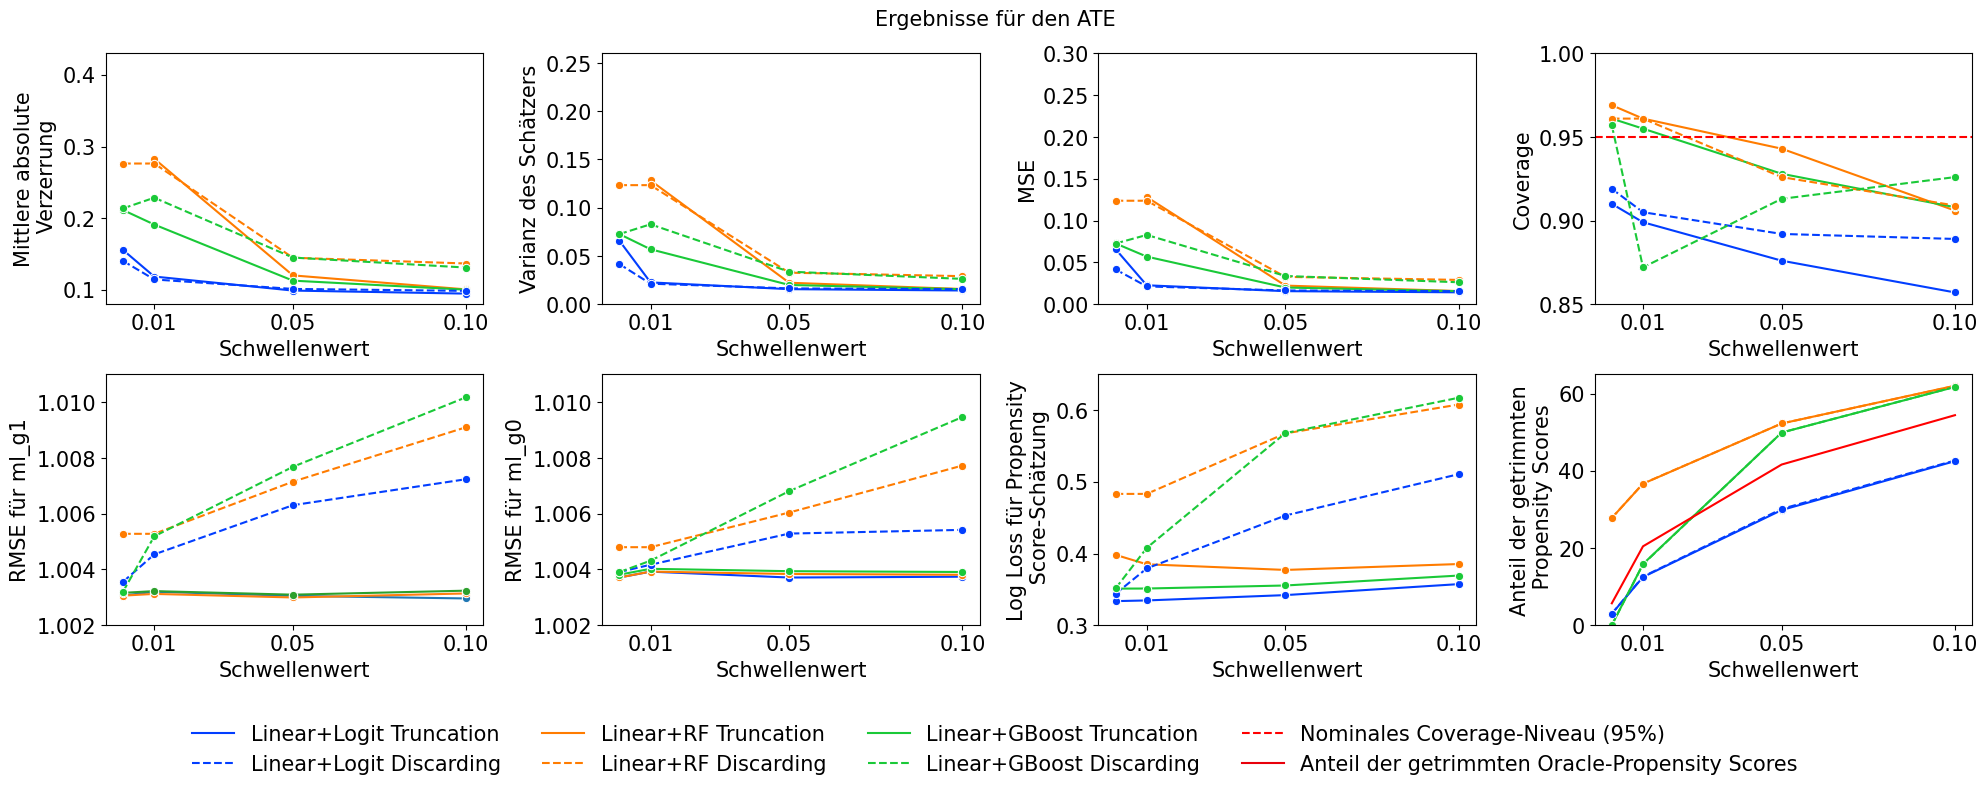

In [19]:
# Ergenisse plotten
for res_name in ['ATTE', 'ATE']:
    fig, ax = plt.subplots(nrows=2 , ncols=4, figsize=(20, 7))
    ax = ax.flatten()

    # Farben aus der 'bright'-Palette extrahieren
    colors = sns.color_palette('bright')

    # Schriftgröße für die Achsenbeschriftung
    for a in ax:
        a.tick_params(axis='both', labelsize=15)
        xticks = [ 0.01, 0.05, 0.1]
        a.set_xticks(xticks)

    # Plot der mittleren absoluten Verzerrung
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_trunc_filtered_bias.loc[df_trunc_filtered_bias.res_name == res_name], ax=ax[0], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[0], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[0].set_xlabel('Schwellenwert', fontsize=15)
    ax[0].set_ylabel('Mittlere absolute\n Verzerrung', fontsize=15)
    ax[0].set_ylim(0.08, 0.43)
    
    # Plot der Varianz des Schätzers
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_trunc_filtered_bias.loc[df_trunc_filtered_bias.res_name == res_name], ax=ax[1],  marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[1],  marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[1].set_xlabel('Schwellenwert', fontsize=15)
    ax[1].set_ylabel('Varianz des Schätzers', fontsize=15)  
    ax[1].set_ylim(0.0, 0.26)
    
    # Plot von MSE
    g=sns.lineplot(x='trim_value', y='MSE', hue='learner', data=df_trunc_filtered_bias.loc[df_trunc_filtered_bias.res_name == res_name], ax=ax[2], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='MSE', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[2], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[2].set_xlabel('Schwellenwert', fontsize=15)
    ax[2].set_ylabel('MSE', fontsize=15)
    ax[2].set_ylim(0.0, 0.3)
    
    # Coverage Plot
    sns.lineplot(x='trim_value', y='coverage', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[3], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='coverage', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[3], marker='o', palette='bright', linestyle='dashed', legend=False)
    # Horizontale Linie für nominales Niveau von Coverage (95%)
    ax[3].axhline(y=0.95, color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)')
    ax[3].set_xlabel('Schwellenwert', fontsize=15)
    ax[3].set_ylabel('Coverage', fontsize=15)    
    if res_name == 'ATTE':
        ax[3].set_ylim(0.68, 1)
    else:
        ax[3].set_ylim(0.85, 1) 
    
    # RMSE für die Behandlungsgruppe ml_g1
    sns.lineplot(x='trim_value', y='mean_loss_g1', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[4], marker='o', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g1', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[4], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[4].set_xlabel('Schwellenwert', fontsize=15)
    ax[4].set_ylabel('RMSE für ml_g1', fontsize=15)    
    ax[4].set_ylim(1.002,  1.011)
    
    # RMSE für die Kontrollgruppe ml_g0
    sns.lineplot(x='trim_value', y='mean_loss_g0', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[5], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g0', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[5], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[5].set_xlabel('Schwellenwert', fontsize=15)
    ax[5].set_ylabel('RMSE für ml_g0', fontsize=15)    
    ax[5].set_ylim(1.002, 1.011)
    
    # Log Loss für die Propensity Score-Schätzung ml_m
    sns.lineplot(x='trim_value', y='mean_loss_m', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[6], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_m', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[6], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[6].set_xlabel('Schwellenwert', fontsize=15)
    ax[6].set_ylabel('Log Loss für Propensity\n Score-Schätzung', fontsize=15)   
    ax[6].set_ylim(0.3, 0.65)  
    
    # Durchschnittlicher Anteil der getrimmten Propensity Score-Werte/Beobachtungen
    sns.lineplot(x='trim_value', y='mean_share_trim', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[7], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_share_trim', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[7], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[7].plot(df_trunc.loc[df_trunc.res_name == res_name]['trim_value'].iloc[0:4], df_trunc.loc[df_trunc.res_name == res_name]['mean_share_trim_orcl'].iloc[0:4], linestyle='-', color='red')
    ax[7].set_xlabel('Schwellenwert', fontsize=15)
    ax[7].set_ylabel('Anteil der getrimmten\n Propensity Scores', fontsize=15)   
    ax[7].set_ylim(0, 65) 

    # Manuelle Legende mit durchgezogenen und gestrichelten Linien
    handles = [
        Line2D([0], [0], color=colors[0], linestyle='-', label='Linear+Logit Truncation'),
        Line2D([0], [0], color=colors[0], linestyle='--', label='Linear+Logit Discarding'),
        Line2D([0], [0], color=colors[1], linestyle='-', label='Linear+RF Truncation'),
        Line2D([0], [0], color=colors[1], linestyle='--', label='Linear+RF Discarding'),
        Line2D([0], [0], color=colors[2], linestyle='-', label='Linear+GBoost Truncation'),
        Line2D([0], [0], color=colors[2], linestyle='--', label='Linear+GBoost Discarding'),
        Line2D([0], [0], color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)'),
        Line2D([0], [0], color=colors[3], linestyle='-', label='Anteil der getrimmten Oracle-Propensity Scores')] 
    
    # Legende korrekt platzieren
    fig.legend(handles=handles, loc='lower center', fontsize=15, bbox_to_anchor=(0.5, -0.14), ncols=4, frameon=False)
    fig.suptitle(f'Ergebnisse für den {res_name}', fontsize=15)  
    fig.tight_layout()
    

In [ ]:
# ATTE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie
results_trunc_for_tab = df_trunc_round[['res_name', 'learner', 'trim_value', 'mean_abs_bias', 'var', 'MSE', 'coverage']]
tab1 = results_trunc_for_tab[results_trunc_for_tab.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)
tab1.to_excel('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/trunc_atte_tabelle.xlsx', index=False)

In [ ]:
# ATE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie
tab2 = results_trunc_for_tab[results_trunc_for_tab.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)
tab2.to_excel('Code/Simulationen mit linearer Regression + Logit, RF, GradBoost/Ergebnisse/trunc_ate_tabelle.xlsx', index=False)